**Lab2-DL:  00a-CNN-basics.ipynb**   ( ELMED219 / BMED365 )

_A short introduction to CNNs for medical students - an AI-assisted notebook prompted and created in "25 minutes"_<br> with [cursor](https://www.cursor.com) and [claude-3.5-sonnet](https://www.anthropic.com/news/claude-3-5-sonnet)


[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/BMED365-2025/blob/main/Lab2-DL/notebooks/00a-CNN-basics.ipynb)


Last updated: 2025-01-16,  A. Lundervold

Using the `bmed365-cuda`conda environment or Google Colab




## Understanding CNNs: A Medical Student's Perspective

Let me explain this neural network architecture using analogies from medical imaging and diagnosis:

### Overview
Think of this CNN like a medical specialist examining an X-ray or histology slide, progressively identifying more complex features before making a diagnosis.

### Layer-by-Layer Explanation (Medical Context):

1. **Input Layer (28x28 Image)**
   - Like receiving a grayscale microscope image or a small X-ray section
   - Similar to what you'd see under low magnification
   - Size: 28x28 pixels, single channel (like a grayscale histology image)

2. **First Convolutional Layer (Conv1)**
   - Similar to your first look through a microscope
   - Detects 32 different basic patterns (like cell edges, basic shapes)
   - Like having 32 different stains each highlighting different basic features
   - Output: 26x26x32 (32 different "views" of the image)

3. **First Pooling Layer (Pool1)**
   - Like stepping back to get a broader view
   - Keeps the most important features while reducing detail
   - Similar to when you zoom out on a microscope to see patterns
   - Reduces size to 13x13, but keeps all 32 feature types

4. **Second Convolutional Layer (Conv2)**
   - Like looking for more complex patterns
   - Now looking for 64 different combinations of the basic features
   - Similar to how you combine basic findings into more complex diagnoses
   - Example: combining cell shape AND arrangement patterns

5. **Second Pooling Layer (Pool2)**
   - Further consolidation of findings
   - Like stepping back again to see even broader patterns
   - Reduces to 5x5 size but maintains 64 feature types

6. **First Fully Connected Layer (FC1)**
   - Like the initial diagnostic reasoning
   - Combines all the observed features (1600 inputs → 128 neurons)
   - Similar to how you integrate multiple findings into differential diagnoses

7. **Final Layer (FC2)**
   - The final diagnosis
   - 10 possible outcomes (like 10 possible diagnoses)
   - Each output represents the likelihood of each diagnosis

### Medical Analogy for the Process:
1. **Initial Examination** (Input → Conv1)
   - Like your first look at a patient or specimen
   - Identifying basic features (edges, shapes, textures)

2. **Pattern Recognition** (Pool1 → Conv2)
   - Similar to recognizing patterns in pathology
   - Combining basic features into meaningful patterns

3. **Integration** (Pool2 → FC1)
   - Like combining multiple clinical findings
   - Building a complete clinical picture

4. **Diagnosis** (FC2)
   - Final diagnostic decision
   - Probability for each possible diagnosis

### Clinical Relevance:
- Similar to how you progress from basic observations to final diagnosis
- Mirrors the medical decision-making process:
  1. Observe basic features
  2. Recognize patterns
  3. Combine findings
  4. Make a diagnosis

This is analogous to how you might examine a histology slide, starting with basic cellular features and progressively integrating information to reach a diagnosis.


## Understanding the CNN Architecture Visualization: A Medical Perspective

This code creates a visual representation of our neural network, similar to how we might draw an anatomical diagram or a clinical workflow. Let me explain it in medical terms:

### Overall Structure
Think of this like creating an anatomical atlas or a clinical pathway diagram:

```python
class CNNVisualizer:
    def __init__(self):
        # Color scheme like different tissue stains or medical diagrams
        self.colors = {
            'input': '#e2e8f0',    # Light gray for raw image (like unstained tissue)
            'conv': '#93c5fd',     # Blue for feature detection (like H&E stain)
            'pool': '#bfdbfe',     # Light blue for summary (like low magnification)
            'fc': '#fca5a5',       # Red for decision making (like diagnostic areas)
            'text': '#1e293b'      # Dark gray for labels
        }
```

### Layer Representation
Similar to how we represent different anatomical structures or diagnostic steps:

```python
layers = [
    # Like progression through microscope magnifications
    {'name': 'Input\n28x28x1', 'type': 'input'},      # Raw specimen
    {'name': 'Conv1\n26x26x32', 'type': 'conv'},      # Initial features (like cell boundaries)
    {'name': 'Pool1\n13x13x32', 'type': 'pool'},      # Broader patterns (like tissue architecture)
    {'name': 'Conv2\n11x11x64', 'type': 'conv'},      # Complex features (like cell arrangements)
    {'name': 'Pool2\n5x5x64', 'type': 'pool'},        # Overall patterns
    {'name': 'FC\n128->10', 'type': 'fc'}             # Final diagnosis
]
```

### Visual Elements

1. **Blocks (Rectangle Patches)**
   - Like different stages in a clinical workflow
   - Size indicates complexity (wider blocks = more complex processing)
   - Colors distinguish different types of analysis (like different staining techniques)

2. **Arrows**
   - Like clinical pathways showing progression
   - Similar to how we draw step-by-step diagnostic processes
   - Shows information flow from observation to diagnosis

3. **Text Labels**
   - Like anatomical labels or diagnostic criteria
   - Shows dimensions and transformations at each stage
   - Helps track the progression of analysis

4. **Legend**
   - Similar to how we label different tissue types in histology
   - Explains the meaning of different colors
   - Helps interpret the diagram

### Medical Analogy
This visualization represents a process similar to:
1. **Input Layer**: Initial patient presentation/specimen
2. **Convolutional Layers**: Detailed examination (like using different microscope objectives)
3. **Pooling Layers**: Stepping back to see broader patterns (like switching to lower magnification)
4. **Fully Connected Layers**: Integration of findings and diagnostic decision-making

### Clinical Relevance
- The diagram flows left-to-right like a clinical pathway
- Different colors represent different types of analysis (like different diagnostic tools)
- The progression mirrors medical decision-making:
  1. Initial observation
  2. Detailed examination
  3. Pattern recognition
  4. Diagnostic conclusion

This visualization helps understand how the CNN processes information, much like how we visualize clinical workflows or anatomical structures in medical education.


## Understanding Convolution: A Medical Student's Perspective

Let me explain this visualization using medical imaging analogies:

### Overview
Think of convolution like applying a specialized filter or stain to highlight specific features in a medical image, similar to how different staining techniques reveal different tissue characteristics.

### The Three Key Components (Like a Staining Process):

1. **Input Feature Map (Original Image)**
   - Like your initial tissue sample or X-ray
   - 5×5 grid of values (like pixel intensities in a small region)
   - Similar to looking at a small section under the microscope

2. **Convolution Kernel (The "Stain" or Filter)**
   - A 3×3 pattern that acts like a specialized stain
   - Values: `[[1, 0, -1], [2, 0, -2], [1, 0, -1]] / 8`
   - Similar to how different stains highlight specific features
   - This particular kernel detects vertical edges (like cell boundaries)

3. **Output Feature Map (The Result)**
   - Shows where the pattern was detected
   - Like the final stained image highlighting specific features
   - 3×3 result showing where the pattern appears strongly

### The Process (Like Staining Protocol):

1. **Window Selection (Step 1)**
   ```
   Take a 3×3 section of the original image
   (Like focusing your microscope on a specific area)
   ```

2. **Pattern Matching (Step 2)**
   ```
   Apply the kernel (like applying a stain)
   Multiply each original value by corresponding kernel value
   (Similar to how stains interact differently with different tissue components)
   ```

3. **Feature Detection (Step 3)**
   ```
   Calculate element-wise products
   (Like seeing how strongly the stain binds to different areas)
   ```

4. **Result Calculation (Step 4)**
   ```
   Sum all products to get final value
   (Like measuring the overall staining intensity in that region)
   ```

### Medical Analogy
- Similar to how you might:
  1. Select a region of interest in a tissue slide
  2. Apply a specific stain
  3. Observe how strongly different areas take up the stain
  4. Quantify the staining intensity

### Clinical Relevance
- Like different staining techniques revealing different features:
  - H&E for general structure
  - Special stains for specific components
  - Immunostains for specific proteins
- The convolution kernel is like choosing the right stain for the feature you want to highlight
- The output shows where these features are most prominent

This visualization helps understand how CNNs can automatically detect features in medical images, similar to how different staining techniques help us visualize different tissue characteristics.


## Understanding Feature Maps: A Medical Student's Perspective

Let me explain this visualization like we're looking at different medical imaging techniques and their interpretations:

### Overview
Think of this like viewing a medical image through different diagnostic filters, similar to how we might look at:
- Different MRI sequences (T1, T2, FLAIR)
- Various staining techniques in pathology
- Different window settings in CT scans

### Layer-by-Layer Visualization:

1. **Convolutional and Pooling Layers**
```python
# For conv/pool layers, show feature maps
n_filters = min(n_cols, feature_map.shape[0])
```
- Like viewing tissue through different stains or filters
- Each feature map (up to 8 shown) highlights different patterns
- Similar to:
  - H&E staining showing different tissue components
  - Different CT window settings (bone, soft tissue, lung)
  - Multiple immunohistochemistry markers

2. **First Fully Connected Layer (FC1)**
```python
# For FC1, keep the histogram visualization
ax.hist(data, bins=50, density=True)
```
- Like looking at the distribution of test results
- Similar to:
  - Blood test value distributions
  - Population health statistics
  - Lab value normal ranges

3. **Final Classification Layer (FC2)**
```python
# For FC2 (final layer), create bar plot with digit labels
ax.bar(x, data, alpha=0.7)
```
- Like viewing differential diagnosis probabilities
- Similar to:
  - Risk scores for different conditions
  - Confidence levels in diagnostic predictions
  - Treatment response probabilities

### Clinical Analogy:

1. **Feature Maps (Conv/Pool)**
   - Like different imaging modalities showing the same anatomy
   - Each map highlights specific features (edges, textures, patterns)
   - Normalized for better visualization (like window/level adjustment)

2. **FC1 Distribution**
   - Like seeing the distribution of clinical measurements
   - Mean and standard deviation provided (like lab reference ranges)
   - Shows the spread of values (like population health metrics)

3. **FC2 Classification**
   - Like a differential diagnosis list
   - Shows confidence for each possible diagnosis
   - Includes statistical measures of certainty

### Statistics and Interpretation:
```python
stats_text = (
    f'Mean: {mean_val:.3f}\n'
    f'Std: {std_val:.3f}\n'
    f'Predicted: {max_digit} ({max_val:.3f})'
)
```
- Similar to:
  - Lab report statistics
  - Diagnostic confidence levels
  - Risk assessment scores

### Clinical Relevance:
- Helps understand how AI "sees" medical images
- Shows progression from raw features to final diagnosis
- Demonstrates confidence levels in predictions
- Similar to how we integrate multiple diagnostic tests

This visualization helps understand how the network processes information, much like how we combine multiple diagnostic tests and observations to reach a clinical conclusion.


## Understanding Classification Results: A Medical Perspective

Let me explain this visualization like we're looking at diagnostic test results and clinical decision-making:

### Overview
This is similar to how we interpret multiple diagnostic tests to reach a final diagnosis, showing both raw test values and their clinical interpretation.

### Two Key Views (Like Lab Results):

1. **Raw Activations (Top Plot)**
````python
# Plot raw activations (like raw lab values)
ax1.bar(x, activations, alpha=0.7)
ax1.set_title('Raw Activations (Logits)')
````
- Like looking at raw lab values before reference range adjustment
- Can be positive or negative (like pH values or electrolyte imbalances)
- Baseline shown at zero (like normal reference line in lab results)

2. **Probabilities (Bottom Plot)**
````python
# Convert to probabilities (like normalized clinical scores)
probabilities = torch.softmax(torch.tensor(activations), dim=0)
````
- Like converting lab values into clinical risk scores
- All values between 0 and 1 (like probability of diagnosis)
- Sum to 100% (like complete differential diagnosis)

### Clinical Statistics:
````python
stats_text = (
    f'Predicted Digit: {predicted_digit}\n'    # Primary diagnosis
    f'Confidence: {max_prob:.3f}\n'            # Diagnostic confidence
    f'Entropy: {entropy:.3f}'                  # Diagnostic uncertainty
)
````

Similar to:
- **Predicted Digit**: Primary diagnosis
- **Confidence**: Like diagnostic certainty (e.g., "90% confident this is pneumonia")
- **Entropy**: Measure of diagnostic uncertainty (like when multiple diagnoses are possible)

### Medical Analogy:
1. **Raw Activations**
   - Like initial lab values or test scores
   - Need interpretation within context
   - Can be positive or negative (like electrolyte imbalances)

2. **Probability Conversion (Softmax)**
   - Like converting lab values to clinical significance
   - Similar to:
     - Risk stratification scores
     - Pre-test to post-test probability
     - Clinical prediction rules

3. **Final Interpretation**
   - Shows most likely diagnosis
   - Includes confidence level
   - Quantifies diagnostic uncertainty

### Clinical Relevance:
- Similar to how we:
  1. Get raw test results
  2. Convert to clinical significance
  3. Make diagnostic decisions
  4. Assess confidence in diagnosis

This visualization helps understand how AI makes decisions, similar to how clinicians integrate multiple pieces of evidence to reach a diagnosis with varying levels of confidence.


## Python Classes for Medical Students: A Clinical Analogy

Think of a Python class like a medical specialty or department in a hospital:

### Class (Like a Medical Department)
```python
class Cardiology:
    def __init__(self):
        # Like setting up the department
        self.equipment = ['ECG', 'Echo']
        self.staff = []
```

### Key Concepts:

1. **Class (Department)**
   - Like a blueprint for a medical department
   - Contains related tools, data, and procedures
   - Example: Cardiology department with its equipment and protocols

2. **Methods (Medical Procedures)**
   ```python
   def perform_ecg(self, patient):
       # Like a specific medical procedure
       return ecg_results
   ```
   - Functions that belong to the class
   - Like standardized medical procedures in your department
   - Can use department's equipment and resources

3. **Attributes (Department Resources)**
   ```python
   self.equipment = ['ECG', 'Echo']  # Department equipment
   self.patient_count = 0            # Department statistics
   ```
   - Like the department's resources and data
   - Shared across all procedures in the department

4. **Instance (Actual Department)**
   ```python
   cardio_dept = Cardiology()  # Creating actual department
   ```
   - Like opening a new department in the hospital
   - Has its own equipment and staff
   - Can perform its procedures

### Medical Analogy:
```python
class EmergencyDepartment:
    def __init__(self):
        # Department setup (like opening a new ED)
        self.beds = 20
        self.patients = []
    
    def admit_patient(self, patient):
        # Like admitting a patient
        self.patients.append(patient)
    
    def treat_patient(self, patient):
        # Like following treatment protocol
        diagnosis = self.examine(patient)
        treatment = self.prescribe(diagnosis)
        return treatment
```

Just like how a hospital department:
- Has standard procedures (methods)
- Maintains its resources (attributes)
- Follows protocols (class structure)
- Can be replicated in different hospitals (instances)


In [16]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


### Importing libraries


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpec
import torch
import torch.nn as nn
import os
import pandas as pd

In [18]:
if is_colab:
  # Create the directory if it doesn't exist:
  if not os.path.exists('mnist_images'):
    os.makedirs('mnist_images')

  # Download the CSV file from GitHub:
  url = 'https://raw.githubusercontent.com/MMIV-ML/BMED365-2025/main/Lab2-DL/notebooks/mnist_images/mnist_data_5000x785.csv'
  mnist_data = pd.read_csv(url)
else:
  mnist_data = pd.read_csv('mnist_images/mnist_data_5000x785.csv')


### Define classes and their functions

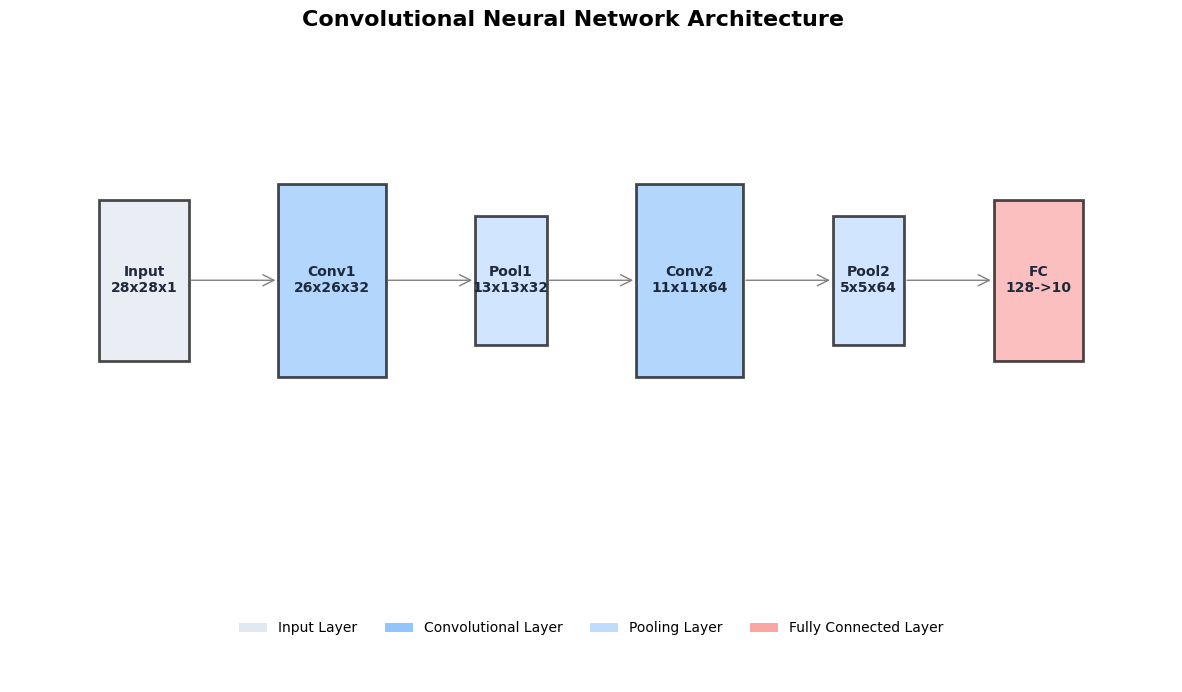

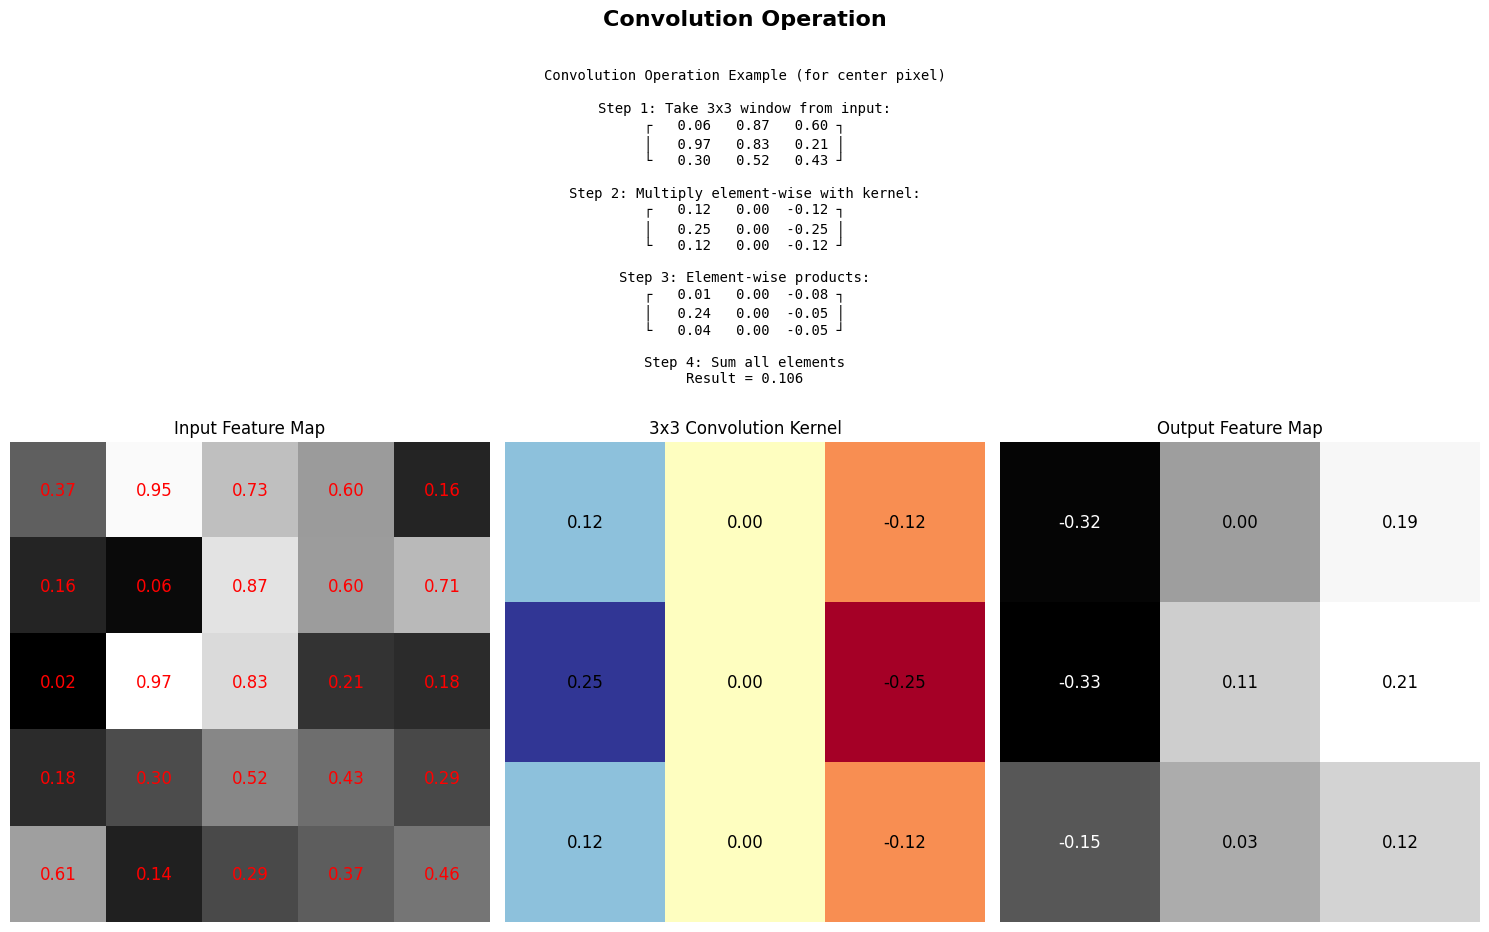

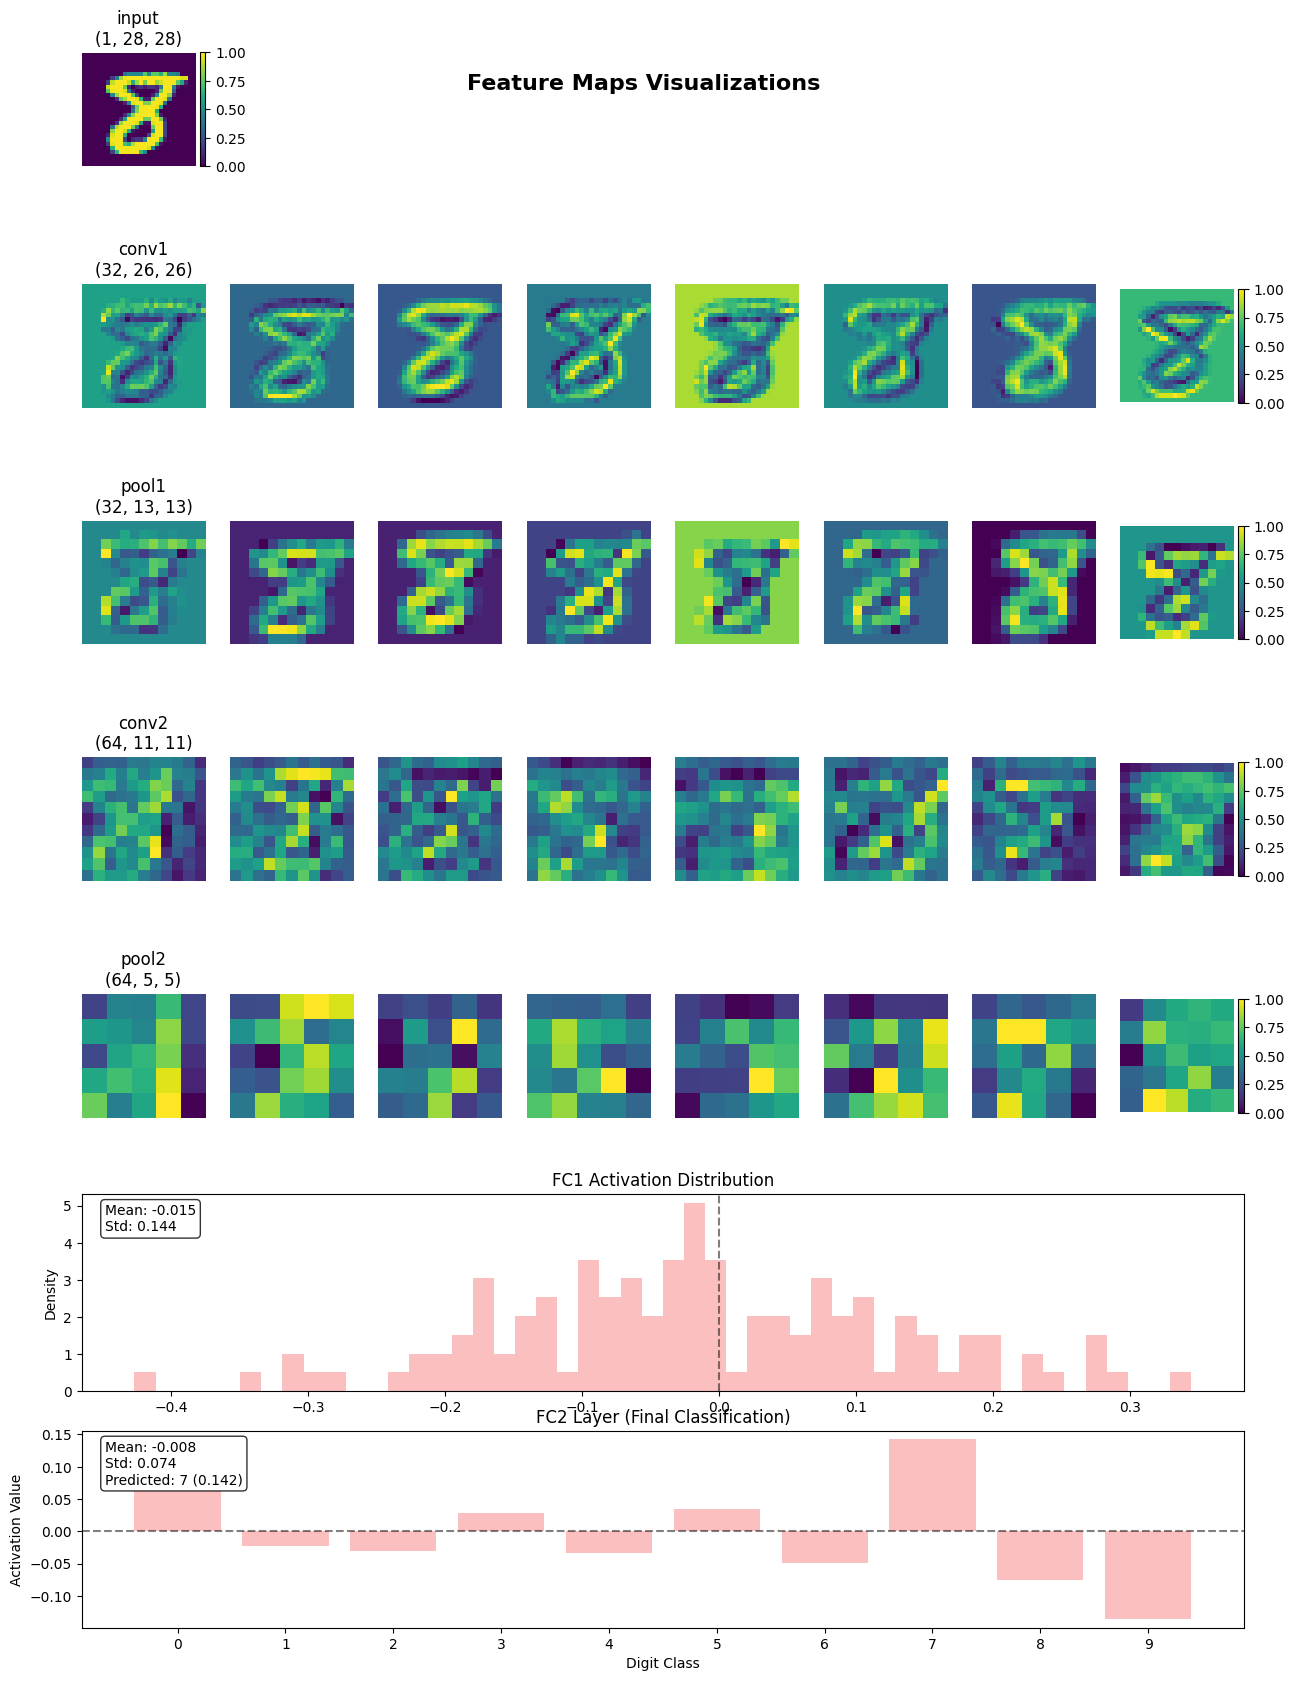

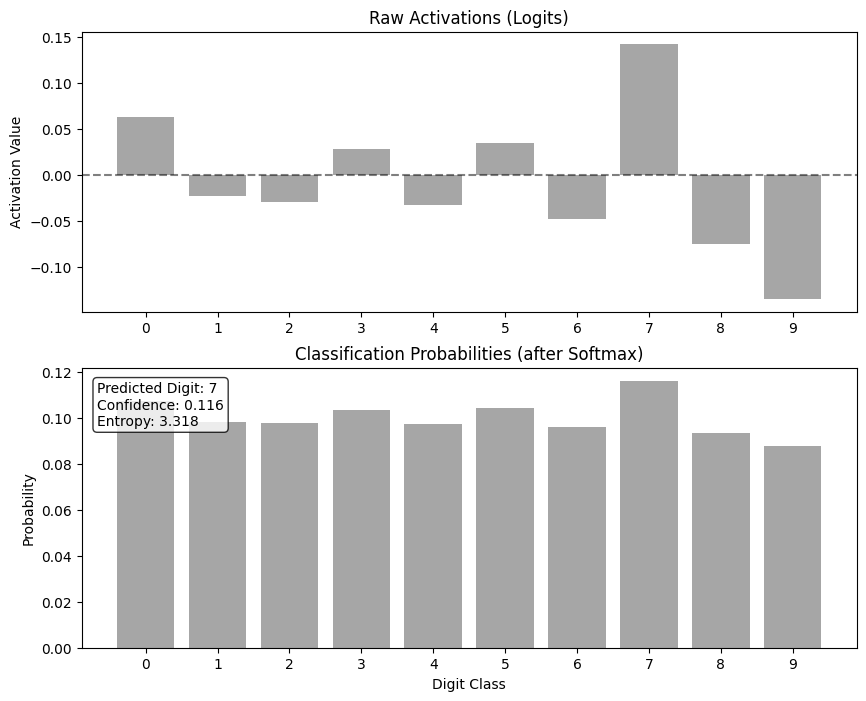

In [19]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # 28x28x1 -> 26x26x32
        self.pool1 = nn.MaxPool2d(2, 2)   # 26x26x32 -> 13x13x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 13x13x32 -> 11x11x64
        self.pool2 = nn.MaxPool2d(2, 2)   # 11x11x64 -> 5x5x64
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        layers = {}
        layers['input'] = x
        x = self.conv1(x)
        layers['conv1'] = x
        x = self.pool1(x)
        layers['pool1'] = x
        x = self.conv2(x)
        layers['conv2'] = x
        x = self.pool2(x)
        layers['pool2'] = x
        x = x.view(-1, 64 * 5 * 5)
        x = self.fc1(x)
        layers['fc1'] = x
        x = self.fc2(x)
        layers['fc2'] = x
        return x, layers

class CNNVisualizer:
    def __init__(self):
        self.colors = {
            'input': '#e2e8f0',
            'conv': '#93c5fd',
            'pool': '#bfdbfe',
            'fc': '#fca5a5',
            'text': '#1e293b'
        }
        
    def draw_architecture(self, save_path=None):
        """Draw the CNN architecture diagram"""
        # Create figure
        fig = plt.figure(figsize=(15, 8))
        gs = GridSpec(2, 1, height_ratios=[4, 1], hspace=0.3)
        ax_arch = fig.add_subplot(gs[0])
        ax_legend = fig.add_subplot(gs[1])
        
        # Layer configurations
        layers = [
            {'name': 'Input\n28x28x1', 'type': 'input', 'width': 1.0},  # Changed × to x
            {'name': 'Conv1\n26x26x32', 'type': 'conv', 'width': 1.2},
            {'name': 'Pool1\n13x13x32', 'type': 'pool', 'width': 0.8},
            {'name': 'Conv2\n11x11x64', 'type': 'conv', 'width': 1.2},
            {'name': 'Pool2\n5x5x64', 'type': 'pool', 'width': 0.8},
            {'name': 'FC\n128->10', 'type': 'fc', 'width': 1.0}  # Changed → to ->
        ]
        
        # Draw layers
        x_offset = 1
        for i, layer in enumerate(layers):
            height = layer['width'] * 1.5
            width = layer['width']
            
            # Calculate y position to center the block
            y_pos = (4 - height) / 2
            
            # Draw the block
            rect = patches.Rectangle(
                (x_offset, y_pos), width, height,
                facecolor=self.colors[layer['type']],
                edgecolor='black',
                alpha=0.7,
                linewidth=2
            )
            ax_arch.add_patch(rect)
            
            # Add text
            ax_arch.text(
                x_offset + width/2, 
                y_pos + height/2,
                layer['name'],
                ha='center',
                va='center',
                color=self.colors['text'],
                fontsize=10,
                fontweight='bold'
            )
            
            # Add arrow if not last layer
            if i < len(layers) - 1:
                arrow = FancyArrowPatch(
                    (x_offset + width, y_pos + height/2),
                    (x_offset + width + 1, y_pos + height/2),
                    arrowstyle='->',
                    mutation_scale=20,
                    color='gray'
                )
                ax_arch.add_patch(arrow)
            
            x_offset += width + 1
        
        # Set plot limits and remove axes
        ax_arch.set_xlim(0, x_offset)
        ax_arch.set_ylim(0, 4)
        ax_arch.axis('off')
        
        # Add legend
        legend_elements = [
            patches.Patch(facecolor=self.colors['input'], label='Input Layer'),
            patches.Patch(facecolor=self.colors['conv'], label='Convolutional Layer'),
            patches.Patch(facecolor=self.colors['pool'], label='Pooling Layer'),
            patches.Patch(facecolor=self.colors['fc'], label='Fully Connected Layer')
        ]
        ax_legend.legend(
            handles=legend_elements,
            loc='center',
            ncol=4,
            frameon=False
        )
        ax_legend.axis('off')
        
        # Add title
        plt.suptitle('Convolutional Neural Network Architecture', 
                    fontsize=16, fontweight='bold', y=0.95)
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            
        return fig



    def visualize_classification(self, activations, save_path=None):
        """
        Visualize the classification results from the FC2 layer.
        
        Args:
            activations (numpy.ndarray): Raw activation values from FC2 layer
            save_path (str, optional): Path to save the visualization. Defaults to None.
        
        Returns:
            matplotlib.figure.Figure: The figure containing the visualization
        """
        # Convert to probabilities using softmax
        probabilities = torch.softmax(torch.tensor(activations), dim=0).numpy()
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 1])
        
        # Plot raw activations
        x = np.arange(len(activations))
        ax1.bar(x, activations, alpha=0.7, color='gray') #self.colors['fc'])
        ax1.set_xticks(x)
        ax1.set_xticklabels([str(i) for i in range(10)])
        ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax1.set_title('Raw Activations (Logits)')
        ax1.set_ylabel('Activation Value')
        
        # Plot probabilities
        ax2.bar(x, probabilities, alpha=0.7, color='gray') #self.colors['fc']) 
        ax2.set_xticks(x)
        ax2.set_xticklabels([str(i) for i in range(10)])
        ax2.set_title('Classification Probabilities (after Softmax)')
        ax2.set_xlabel('Digit Class')
        ax2.set_ylabel('Probability')
        
        # Add statistics
        predicted_digit = np.argmax(probabilities)
        max_prob = np.max(probabilities)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
        
        stats_text = (
            f'Predicted Digit: {predicted_digit}\n'
            f'Confidence: {max_prob:.3f}\n'
            f'Entropy: {entropy:.3f}'
        )
        
        ax2.text(0.02, 0.95, stats_text,
                transform=ax2.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        #plt.suptitle('MNIST Digit Classification Analysis', fontsize=12, fontweight='bold')
        #plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig



    def visualize_feature_maps(self, model, input_image, save_path=None):
        """Visualize feature maps at each layer of the CNN"""
        # Ensure model is in eval mode
        model.eval()
        
        # Forward pass with feature map collection
        with torch.no_grad():
            _, feature_maps = model(input_image)
        
        # Create figure with dynamic size
        n_layers = len(feature_maps)
        n_cols = 8  # Maximum number of feature maps per layer
        fig = plt.figure(figsize=(15, 3 * n_layers))
        
        # Plot feature maps for each layer
        for idx, (layer_name, feature_map) in enumerate(feature_maps.items()):
            feature_map = feature_map.squeeze(0)  # Remove batch dimension
            
            if layer_name in ['fc1', 'fc2']:
                ax = plt.subplot(n_layers, 1, idx + 1)
                data = feature_map.numpy()


                if layer_name == 'fc2':
                    # For FC2 (final layer), create bar plot with digit labels
                    x = np.arange(len(data))
                    ax.bar(x, data, alpha=0.7, color=self.colors['fc'])
                    ax.set_xticks(x)
                    ax.set_xticklabels([str(i) for i in range(10)])
                    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
                    
                    # Add statistics
                    mean_val = np.mean(data)
                    std_val = np.std(data)
                    max_digit = np.argmax(data)
                    max_val = np.max(data)
                    
                    stats_text = (
                        f'Mean: {mean_val:.3f}\n'
                        f'Std: {std_val:.3f}\n'
                        f'Predicted: {max_digit} ({max_val:.3f})'
                    )
                    
                    ax.text(0.02, 0.95, stats_text,
                        transform=ax.transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                    
                    ax.set_title('FC2 Layer (Final Classification)')
                    ax.set_xlabel('Digit Class')
                    ax.set_ylabel('Activation Value')

                    # Create separate classification visualization
                    class_fig = self.visualize_classification(data, 'classification.png')

                    
                else:
                    # For FC1, keep the histogram visualization
                    ax.hist(data, bins=50, density=True, alpha=0.7, color=self.colors['fc'])
                    ax.axvline(x=0, color='black', linestyle='--', alpha=0.5)
                    
                    # Add statistics
                    mean_val = np.mean(data)
                    std_val = np.std(data)
                    ax.text(0.02, 0.95, 
                        f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}',
                        transform=ax.transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                    
                    ax.set_title('FC1 Activation Distribution')
                    #ax.set_xlabel('Activation Value')
                    ax.set_ylabel('Density')
                
            else:
                # For conv/pool layers, show feature maps
                n_filters = min(n_cols, feature_map.shape[0])
                for i in range(n_filters):
                    ax = plt.subplot(n_layers, n_cols, idx * n_cols + i + 1)
                    
                    # Normalize feature map for better visualization
                    fm = feature_map[i].numpy()
                    vmin, vmax = fm.min(), fm.max()
                    if vmin != vmax:
                        fm = (fm - vmin) / (vmax - vmin)
                    
                    im = ax.imshow(fm, cmap='viridis')
                    ax.axis('off')
                    
                    # Add title to first feature map in row
                    if i == 0:
                        ax.set_title(f'{layer_name}\n{tuple(feature_map.shape)}')
                    
                    # Add colorbar to last feature map in row
                    if i == n_filters - 1:
                        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
                plt.suptitle('Feature Maps Visualizations', 
                        fontsize=16, 
                        fontweight='bold', 
                        y=0.85) # Increase y value to move title up
                #plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig  
     

    def visualize_convolution(self, save_path=None):
        """Visualize the convolution operation"""
        # Create figure with extra space for equations
        fig = plt.figure(figsize=(15, 10))
        gs = GridSpec(2, 3, height_ratios=[1, 2])
        
        # Create axes for equations and images
        ax_eq = fig.add_subplot(gs[0, :])
        ax1 = fig.add_subplot(gs[1, 0])
        ax2 = fig.add_subplot(gs[1, 1])
        ax3 = fig.add_subplot(gs[1, 2])
        
        # Create example input, kernel, and output
        np.random.seed(42)
        input_data = np.random.rand(5, 5)
        kernel = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]]) / 8
        
        # Calculate output
        output = np.zeros((3, 3))
        for i in range(3):
            for j in range(3):
                output[i, j] = np.sum(input_data[i:i+3, j:j+3] * kernel)
        
        # Create text equation for center pixel calculation
        i, j = 1, 1  # Center position
        window = input_data[i:i+3, j:j+3]
        result = output[i, j]  # Fixed: use i,j instead of i-1,j-1
        
        # Calculate element-wise products for visualization
        products = window * kernel
        
        # Create a more detailed explanation with ASCII art style matrices
        eq_text = (
            "Convolution Operation Example (for center pixel)\n\n"
            "Step 1: Take 3x3 window from input:\n"
            f"┌ {window[0,0]:6.2f} {window[0,1]:6.2f} {window[0,2]:6.2f} ┐\n"
            f"│ {window[1,0]:6.2f} {window[1,1]:6.2f} {window[1,2]:6.2f} │\n"
            f"└ {window[2,0]:6.2f} {window[2,1]:6.2f} {window[2,2]:6.2f} ┘\n\n"
            "Step 2: Multiply element-wise with kernel:\n"
            f"┌ {kernel[0,0]:6.2f} {kernel[0,1]:6.2f} {kernel[0,2]:6.2f} ┐\n"
            f"│ {kernel[1,0]:6.2f} {kernel[1,1]:6.2f} {kernel[1,2]:6.2f} │\n"
            f"└ {kernel[2,0]:6.2f} {kernel[2,1]:6.2f} {kernel[2,2]:6.2f} ┘\n\n"
            "Step 3: Element-wise products:\n"
            f"┌ {products[0,0]:6.2f} {products[0,1]:6.2f} {products[0,2]:6.2f} ┐\n"
            f"│ {products[1,0]:6.2f} {products[1,1]:6.2f} {products[1,2]:6.2f} │\n"
            f"└ {products[2,0]:6.2f} {products[2,1]:6.2f} {products[2,2]:6.2f} ┘\n\n"
            "Step 4: Sum all elements\n"
            f"Result = {result:.3f}"
        )
        
        # Add equation with monospace font for alignment
        ax_eq.text(0.5, 0.5, eq_text,
                ha='center', va='center',
                transform=ax_eq.transAxes,
                fontsize=10,
                family='monospace')
        ax_eq.axis('off')
        
        # Plot input with values
        im1 = ax1.imshow(input_data, cmap='gray')
        for i in range(input_data.shape[0]):
            for j in range(input_data.shape[1]):
                text = ax1.text(j, i, f'{input_data[i, j]:.2f}',
                            ha='center', va='center', 
                            color='red', fontsize=12)
        ax1.set_title('Input Feature Map')
        ax1.axis('off')
        
        # Plot kernel with values
        im2 = ax2.imshow(kernel, cmap='RdYlBu')
        for i in range(kernel.shape[0]):
            for j in range(kernel.shape[1]):
                text = ax2.text(j, i, f'{kernel[i, j]:.2f}',
                            ha='center', va='center', 
                            color='black', fontsize=12)
        ax2.set_title('3x3 Convolution Kernel')
        ax2.axis('off')
        
        # Plot output with values
        im3 = ax3.imshow(output, cmap='gray')
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                # Get pixel value and normalize it to [0, 1]
                pixel_value = output[i, j]
                normalized_value = (pixel_value - output.min()) / (output.max() - output.min())
                
                # Choose white for dark pixels, black for bright pixels
                text_color = 'white' if normalized_value < 0.5 else 'black'
                
                text = ax3.text(j, i, f'{pixel_value:.2f}',
                            ha='center', va='center', 
                            color=text_color, fontsize=12)
        ax3.set_title('Output Feature Map')
        ax3.axis('off')
        
        plt.suptitle('Convolution Operation', fontsize=16, fontweight='bold')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            
        return fig





# Example usage
if __name__ == "__main__":
    # Create visualizer
    visualizer = CNNVisualizer()
    
    # Draw and save architecture
    arch_fig = visualizer.draw_architecture(save_path='mnist_images/cnn_architecture.png')
    
    # Draw and save convolution operation
    conv_fig = visualizer.visualize_convolution(save_path='mnist_images/convolution_operation.png')
    
    # Create model and random input for feature map visualization
    model = SimpleCNN()
    dummy_input = torch.randn(1, 1, 28, 28)  # Batch size 1, 1 channel, 28x28

    # Load and preprocess the MNIST image
    img_path = "mnist_images/mnist_image_0000.png"
    if is_colab:
        url = f'https://raw.githubusercontent.com/MMIV-ML/BMED365-2025/main/Lab2-DL/notebooks/{img_path}'
        # Read the image from the URL
        img = plt.imread(url)
    else:
        img = plt.imread(img_path)
    
    # Convert RGBA to grayscale if necessary
    if len(img.shape) == 3:  # If image has multiple channels
        img = img[:, :, 0]  # Take first channel
    
    # Convert to tensor and add batch & channel dimensions
    input_image = torch.from_numpy(img).float()
    input_image = input_image.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 28, 28)
  
    # We can either use the dummy_input or the input_image from MNIST (digit 8)
    feature_fig = visualizer.visualize_feature_maps(
        model, input_image, save_path='mnist_images/feature_maps.png'
    )
    
    plt.show()

### Understanding the Feature Maps Visualization

The visualization shows how the input image is transformed as it passes through different layers of the Convolutional Neural Network (CNN). Let's break down each layer:

#### Input Layer
- Shows the original 28×28 grayscale image
- Single channel input (shape: 1×28×28)
- Random values in this case (from torch.randn)
- Displays the raw pixel intensities before any processing

#### Conv1 Layer
- First convolutional layer with 32 filters
- Output shape: 26×26×32 (reduced from 28×28 due to 3×3 kernel without padding)
- Each feature map shows different patterns/features learned by individual filters
- Some filters may activate on edges, others on textures or specific patterns

#### Pool1 Layer
- First max pooling layer (2×2 window with stride 2)
- Output shape: 13×13×32 (halved dimensions from Conv1)
- Preserves important features while reducing spatial dimensions
- Helps achieve spatial invariance and reduces computation

#### Conv2 Layer
- Second convolutional layer with 64 filters
- Output shape: 11×11×64
- Learns more complex features by combining patterns from Pool1
- Higher-level features compared to Conv1 (more abstract patterns)

#### Pool2 Layer
- Second max pooling layer
- Output shape: 5×5×64
- Further reduces spatial dimensions
- Maintains most important features for classification

#### FC1 Activation Distribution
- First fully connected layer (flattened Pool2 → 128 neurons)
- Shows histogram of activation values
- Mean and standard deviation indicate the spread of activations
- Distribution shape reveals how neurons are utilizing the activation space

#### FC2 Activation Distribution
- Final fully connected layer (128 → 10 neurons)
- Output corresponds to class probabilities (for MNIST digits 0-9)
- Distribution typically shows more distinct patterns as it's directly related to classification
- Mean and std values indicate the confidence and spread of predictions

The progression through these layers demonstrates how the network transforms from raw pixel data to increasingly abstract features, ultimately leading to classification outputs. The feature maps provide insights into what patterns each layer has learned to detect.


### Remark on the FC2 layer (final classification layer)

In the FC2 layer (final classification layer), the decision process follows these steps:

1. **Raw Activations**: 
   - Each neuron outputs an activation value for digits 0-9
   - These values can be positive or negative
   - They are often called "logits" in this raw form

2. **Softmax Transformation**:
   - To convert these raw activations into probabilities, we apply the softmax function:
   ```python
      probabilities = torch.softmax(activations, dim=0)
   ```
   - Softmax formula: P(class_i) = exp(activation_i) / Σ(exp(activation_j))
   - This ensures:
     - All values are positive (0 to 1)
     - Sum of probabilities equals 1
     - Preserves relative ordering of activations

3. **Final Decision**:
   - The digit with the highest probability is chosen as the prediction
   - In code:



This visualization shows:
1. **Raw Activations**:
   - Positive and negative values
   - Relative strengths of each class
   - Zero baseline for reference

2. **Probabilities**:
   - Values between 0 and 1
   - Sum to 1.0
   - Easy to interpret as confidence scores
   - Entropy shows uncertainty in prediction

The network's decision is based on these probabilities, not the raw activations directly. A high positive activation generally leads to a high probability, but the softmax function considers the relative differences between all activations when computing the final probabilities. <br>Entropy: {-np.sum(probabilities * np.log2(probabilities + 1e-10)):.3f}

